In [124]:
import pandas as pd
from scipy import stats
import numpy as np

In [125]:
df = pd.read_csv("../df_extended_v2.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3869 entries, 0 to 3868
Columns: 108 entries, Unnamed: 0 to vj72.2h
dtypes: float64(3), int64(84), object(21)
memory usage: 3.2+ MB


In [126]:
no_middle = df[df.education_level == 0]
middle = df[df.education_level == 1]
tech = df[df.education_level == 2]
high = df[df.education_level == 3]

Искл асперантуру и ординатуру тк в нашем датасете их мало и edu level == 4 нет


'vj72.6h2', 'vj72.6h', 'vj72.5h4', 'vj72.5h3', 'vj72.5h2', 'vj72.5h', 'vj72.4h2', 'vj72.4h', 'vj72.3h2', 'vj72.3h', 'vj72.2h2', 'vj72.2h'


In [127]:
no_middle["is_remote_no_middle"] = (no_middle["vj72.2h2"] == "Нет") | (
    no_middle["vj72.2h"] == "Нет"
)
no_middle.is_remote_no_middle.value_counts()

is_remote_no_middle
False    319
True       2
Name: count, dtype: int64

In [128]:
middle["is_remote_middle"] = (middle["vj72.3h"] == "Нет") | (middle["vj72.3h2"] == "Нет")
middle.is_remote_middle.value_counts()

is_remote_middle
False    1095
True        8
Name: count, dtype: int64

In [129]:
tech["is_remote_tech"] = (tech["vj72.5h2"] == "Нет") | (tech["vj72.5h2"] == "Нет")
tech.is_remote_tech.value_counts()

is_remote_tech
False    1057
True        6
Name: count, dtype: int64

In [130]:
high["is_remote_high"] = (
    (high["vj72.5h4"] == "Нет")
    | (high["vj72.5h3"] == "Нет")
    | (high["vj72.5h2"] == "Нет")
    | (high["vj72.5h"] == "Нет")
)
high.is_remote_high.value_counts()

is_remote_high
False    799
True     583
Name: count, dtype: int64

In [131]:
high[high.is_remote_high == True].log_wage.median(), high[
    high.is_remote_high == False
].log_wage.median()

(10.05359, 10.05359)

In [132]:
stats.mannwhitneyu(
    high[high.is_remote_high == True].log_wage, high[high.is_remote_high == False].log_wage
)

MannwhitneyuResult(statistic=231209.0, pvalue=0.8164593714545441)

<Axes: >

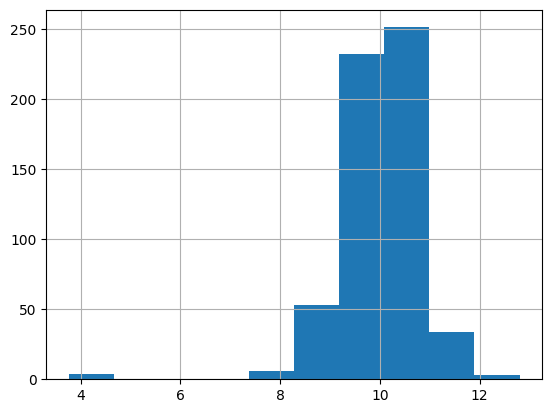

In [133]:
high[high.is_remote_high == True].log_wage.hist()

In [134]:
high[high.is_remote_high == True].age.max()

59

<Axes: >

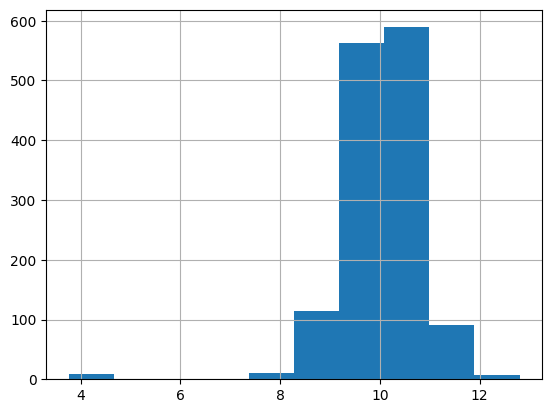

In [135]:
high["log_wage"].hist()

In [136]:
stats.shapiro(high.log_wage)

ShapiroResult(statistic=0.8312497138977051, pvalue=7.148296372199416e-36)

In [137]:
# df['is_remote'] = df.apply(lambda x: )

In [138]:
df = df.merge(
    no_middle[["idind", "is_remote_no_middle"]],
    how="left",
    on="idind",
).merge(
    middle[["idind", "is_remote_middle"]],
    how="left",
    on="idind",
).merge(
    tech[["idind", "is_remote_tech"]],
    how="left",
    on="idind",
).merge(
    high[["idind", "is_remote_high"]],
    how="left",
    on="idind",
)

In [139]:
df['is_remote'] = df[['is_remote_no_middle', 'is_remote_middle', 'is_remote_tech', 'is_remote_high']].apply(lambda row: True if any(row) else ())

In [140]:
df.apply(lambda x: print(x), axis=1)

Unnamed: 0                       0
idind                           37
region                 Волосовский
city_type                      ПГТ
age                             59
                          ...     
is_remote_no_middle            NaN
is_remote_middle             False
is_remote_tech                 NaN
is_remote_high                 NaN
is_remote                      NaN
Name: 0, Length: 113, dtype: object
Unnamed: 0                       1
idind                          122
region                 Волосовский
city_type                     Село
age                             40
                          ...     
is_remote_no_middle            NaN
is_remote_middle               NaN
is_remote_tech                 NaN
is_remote_high                True
is_remote                      NaN
Name: 1, Length: 113, dtype: object
Unnamed: 0                       2
idind                          125
region                 Волосовский
city_type                     Село
age               

0       None
1       None
2       None
3       None
4       None
        ... 
3864    None
3865    None
3866    None
3867    None
3868    None
Length: 3869, dtype: object

In [141]:
# def check(x: int):
#     all_nan = True
#     found_true = False
#     for i in row:
#         if i is not None:
#             all_nan = False
#             if i:
#                 found_true = True
#     if all_nan:
#         return None
#     return found_true
def check(row: list):
    all_nan = True
    found_true = False
    for i in row:
        if i is not np.nan:
            all_nan = False
            if i:
                found_true = True
    if all_nan:
        return np.nan
    return found_true

In [142]:
check([np.nan, np.nan, False])

False

In [143]:
df.head()

,Unnamed: 0,idind,region,city_type,age,is_male,industry,log_wage,is_gov,internet,...,vj72.4h,vj72.3h2,vj72.3h,vj72.2h2,vj72.2h,is_remote_no_middle,is_remote_middle,is_remote_tech,is_remote_high,is_remote
0,0,37,Волосовский,ПГТ,59,1,"НАУКА, КУЛЬТ",8.954980,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN
1,1,122,Волосовский,Село,40,0,ОБРАЗОВАНИЕ,10.628960,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN
2,2,125,Волосовский,Село,53,0,СЕЛЬСКОЕ ХОЗ,10.341270,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN
3,3,126,Волосовский,Село,47,1,СЕЛЬСКОЕ ХОЗ,9.753487,0,0,...,NaN,NaN,Да,NaN,NaN,NaN,False,NaN,NaN,NaN
4,4,132,Волосовский,Село,54,0,ЗДРАВООХРАНЕ,10.158950,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN


In [144]:
df['is_remote'] = df[['is_remote_no_middle', 'is_remote_middle', 'is_remote_tech', 'is_remote_high']].apply(check, axis=1)

In [145]:
df = df.drop(['is_remote_no_middle', 'is_remote_middle', 'is_remote_tech', 'is_remote_high'], axis=1)

In [146]:
print(*df.columns)

Unnamed: 0 idind region city_type age is_male industry log_wage is_gov internet num_children is_urban education_level id1 id2 id3 id4 id5 id6 id7 id8 id9 id10 id11 id12 id13 id14 id15 id16 id17 id18 id19 id20 id21 id22 id23 id24 id25 id26 id27 id28 id29 id30 id31 id32 id33 id34 id35 id36 id37 id38 id39 id40 id41 id42 id43 id44 id45 id46 id47 id48 id49 id50 id51 id52 id53 id54 id55 id56 id57 id58 id59 id60 id61 id62 id63 id64 id65 id66 id67 id68 id69 id70 id71 id72 id73 id74 id75 job_satisfaction job_salary_satisfaction career_oportunities_satisfaction money_ladder power_ladder respect_ladder do_you_consume_alcohol did_you_drink_alcohol_in_last_30_days vj72.6h2 vj72.6h vj72.5h4 vj72.5h3 vj72.5h2 vj72.5h vj72.4h2 vj72.4h vj72.3h2 vj72.3h vj72.2h2 vj72.2h is_remote


In [147]:
df['is_remote'].isna().sum()

0

In [148]:
df.to_csv("df_extended_v2_remote.csv")

In [149]:
df.is_remote.sum()

599

In [150]:
df[df['education_level'] != 3]['is_remote'].sum()

16